**Table of Contents**
* Auto Data Analysis
* Data Acquisition
* Read Data
* Add Headers
* Save Dataset
  * Data Normalization
  * Binning
  * Turn Catergorical Variables into Quantitative Variables
* Evaluating for Missing Data
  * Count missing Values in each column
  * Deal with missing data
  * Data Standartization
  * Data Normalization
  * Binning
    * Bins Visualization
  * Indicator Variable
* Exploratory Data Analysis
  * Correlations
  * Categorical Statistical Analysis
    * VAlue Counts
  * Basics of Grouping
  * Correlation and Causation
* Model Development
  * Linear Regression and Multiple Linear Regression
    * Linear Regression
    * Multiple Linear Regression
  * Model Evaluation Using Visualization
    * Regression Plot and Pipelines
      * Pipeline
    * Measures for In-Sample Evaluation
      * Model 1. Simple Linear Regression
      * Model 2. Multiple Linear Regression
      * Model 3. Polynomial Fit
      * MSE
    * Prediction and DEcision Making
      * Prediction
      * Decision Making: Determining a Good Model Fit
      * Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
      * SImple Linear Model (SLR) vs Polynomial Fit
      * Multiple Linear Regression (MLR) vs Polynomial Fit
    * Conclusion
* Model Evaluation and Refinement
  * Part 1: Training and Testing
  * Cross-Validation Score
  * Part 2: Overfitting, Underfitting and Model Selectrion
  * Part 3: Ridge Regression
  * Part 4: Grid Search



  

# Auto Data Analysis <a id="auto_data_analysis"></a>


## Data Acquisition

A data set is typically a file containing data stored in one of several formats. Common file formats containing data sets include: .csv, .json, .xlsx etc. The data set can be stored in different places, on your local machine, on a server or a websiite, cloud storage and so on.

To analyse data in a Python notebook, we need to bring the data set into the notebook.

The Automobile Data set is an online source, and it is in a CSV (comma separated value) format. Let's use this data set as an example.
<ul>
    <li>Data source: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a></li>
    <li>Data type: csv</li>
</ul>
The Pandas Library is a very popular and very useful tool that enables us to read various datasets into a data frame; our Jupyter notebook platforms have a built-in <b>Pandas Library</b> so that all we need to do is import Pandas without installing.
</p>


In [ ]:
# Define required imports
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# These set pandas max column and row display in the notebook
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

## Read Data <a id="read_data"></a>

We utilize the `pandas.read_csv()` function for reading CSV files.


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None)

In [ ]:
print("The last 10 rows of the dataframe\n")
df.tail(10)

The last 10 rows of the dataframe



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## Add Headers ##
<p>
Take a look at the data set. Pandas automatically set the header with an integer starting from 0.
</p>
<p>
To better describe the data, you can introduce a header. This information is available at:  <a href="https://archive.ics.uci.edu/ml/datasets/Automobile" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>.
</p>
<p>
Thus, you have to add headers manually.
</p>
<p>
First, create a list "headers" that include all column names in order.
Then, use <code>dataframe.columns = headers</code> to replace the headers with the list you created.
</p>


In [ ]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [ ]:
# REplace headers and check the data
df.columns = headers
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# Now, we need to replace the "?" symbol with NaN so the dropna() can remove the missing values:
df1=df.replace('?',np.NaN)

In [ ]:
#You can drop missing values along the column "price" as follows:
df=df1.dropna(subset=["price"], axis=0)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Save Dataset ##
<p>
Correspondingly, Pandas enables you to save the data set to CSV. By using the <code>dataframe.to_csv()</code> method, you can add the file path and name along with quotation marks in the brackets.
</p>
<p>
For example, if you save the data frame <b>df</b> as <b>automobile.csv</b> to your local machine, you may use the syntax below, where <code>index = False</code> means the row names will not be written.
</p>


In [ ]:
df.to_csv("automobile.csv", index=False)

In [ ]:
# df["city-mpg"] = 235/df["city-mpg"]
# df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df["highway-mpg"].dtypes  # df.["price"] = df.["price"].astype("int")

dtype('int64')

### Data Normalizetion

1. Simple Feature Normalization `df["length"]=df["length"]/df.["length"].max()`
2. Min-Max in Python `df["length"]=(df["length"] - df["length"].min())/(df.["length"].max() - df["length"].min())`
3. Z-Score in Python `df["length"] = (df["length"] - df["length"].mean())/df.["length"].std()`

### Binning

Group numerical values, for example car prices as
- `goup_names = ["Low", "Medium", "High"]`
- `bins = np.linspace(min(df["price"]), max(df["price"]), 4)`
- `df["price-binned"] = pd.cut(df["price"], bins, label=group_names, include_lowest=True)`

### Turn Categorical VAriables into Quantitative (numerical) Variables

For example, `fuel` has only two variables: gas and diesel, so we convert them into numerical values. `pd.get_dummies(df["fuel"])`


In [ ]:
pd.get_dummies(df["fuel-type"], dtype=int).head(10)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
10,0,1


## Evaluating for Missing Data ##

The missing values are converted by default. Use the following functions to identify these missing values. You can use two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Count missing values in each column ###
<p>
Using a for loop in Python, you can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the data set.  In the body of the for loop the method ".value_counts()" counts the number of "True" values.
</p>


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
symboling
False    201
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      37
Name: count, dtype: int64

make
make
False    201
Name: count, dtype: int64

fuel-type
fuel-type
False    201
Name: count, dtype: int64

aspiration
aspiration
False    201
Name: count, dtype: int64

num-of-doors
num-of-doors
False    199
True       2
Name: count, dtype: int64

body-style
body-style
False    201
Name: count, dtype: int64

drive-wheels
drive-wheels
False    201
Name: count, dtype: int64

engine-location
engine-location
False    201
Name: count, dtype: int64

wheel-base
wheel-base
False    201
Name: count, dtype: int64

length
length
False    201
Name: count, dtype: int64

width
width
False    201
Name: count, dtype: int64

height
height
False    201
Name: count, dtype: int64

curb-weight
curb-weight
False    201
Name: count, dtype: int64

engine-type
engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    201
Nam

### Deal with missing data

<b>How should you deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


You should only drop whole columns if most entries in the column are empty. In the data set, none of the columns are empty enough to drop entirely.
You have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. Apply each method to different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four".
        <ul>
            <li>Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.</li>
        </ul>
    </li>
</ul>


#### Calculate the mean value for the "normalized-losses" column ####


In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


#### Replace "NaN" with mean value in "normalized-losses" column ####


In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### Calculate the mean value for the "bore" column ####


In [ ]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

# Replace "NaN" with the mean value in the "bore" column
df['bore'].replace(np.nan, avg_bore, inplace=True)

Average of bore: 3.330710659898477


In [ ]:
# Calculate the mean value for the "horsepower" column
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

# Replace "NaN" with the mean value in the "horsepower" column
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

# Calculate the mean value for "peak-rpm" column
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

# Replace "NaN" with the mean value in the "peak-rpm" column
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average horsepower: 103.39698492462311
Average peak rpm: 5117.587939698493


In [ ]:
#replace the missing 'num-of-doors' values by the most frequent
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [ ]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [ ]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [ ]:
# Convert data types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

## Data Standardization
<p>
You usually collect data from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)
</p>
    
<b>What is standardization?</b>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In your data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>You will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


<p>Use this formula for unit conversion:<p>
L/100km = 235 / mpg
<p>You can do many mathematical operations directly using Pandas.</p>


In [ ]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


## Data Normalization

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li>
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
</p>

<b>Example</b>
<p>To demonstrate normalization, say you want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace the original value by (original value)/(maximum value)</p>


In [ ]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## Binning
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>
<p>In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.</p>

<p>Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


In [ ]:
# Convert data to correct format:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

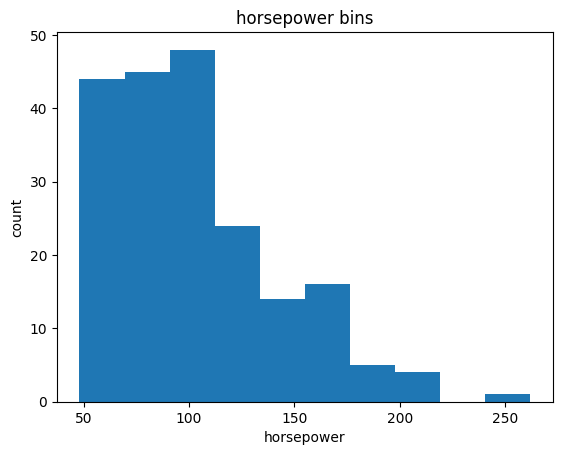

In [ ]:
# Plot the histogram of horsepower to see the distribution of horsepower.
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [ ]:
# Build a bin array with a minimum value to a maximum value by using the bandwidth calculated above.
# The values will determine when one bin ends and another begins.
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
# Set group names
group_names = ['Low', 'Medium', 'High']

# Apply the function "cut" to determine what each value of df['horsepower'] belongs to.
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [ ]:
# See the number of vehicles in each bin:
df["horsepower-binned"].value_counts()

,count
horsepower-binned,
Low,153
Medium,43
High,5


Text(0.5, 1.0, 'horsepower bins')

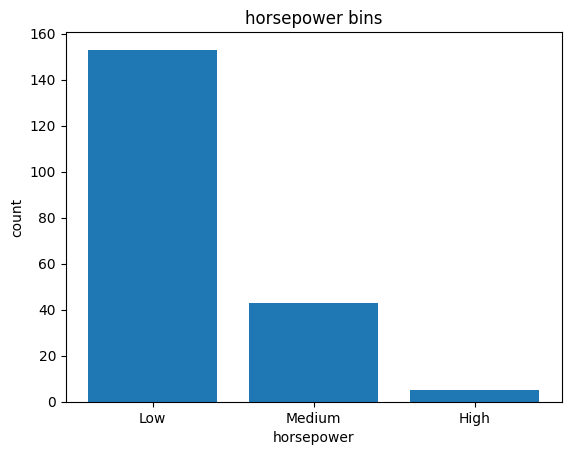

In [ ]:
# Plot the distribution of each bin:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Bins Visualization ###
Normally, you use a histogram to visualize the distribution of bins we created above.


Text(0.5, 1.0, 'horsepower bins')

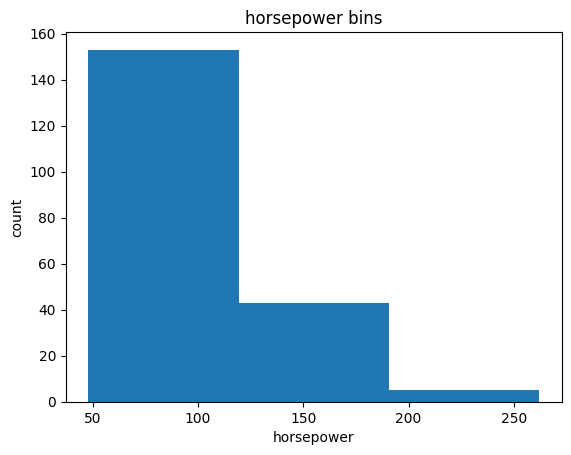

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Indicator Variable
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.
</p>

<b>Why use indicator variables?</b>
<p>
    You use indicator variables so you can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.
</p>

<p>
    Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type.
</p>


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [ ]:
# Get the indicator variables and assign it to data frame "dummy_variable_1":
dummy_variable_1 = pd.get_dummies(df["fuel-type"], dtype=int)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# Change the column names for clarity:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


In [ ]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'], dtype="int")

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

In [ ]:
df.to_csv('clean_df.csv')

# Exploratory Data Analysis


Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Explore features or characteristics to predict price of car
* Analyze patterns and run descriptive statistical analysis
* Group data based on identified parameters and create pivot tables
* Identify the effect of independent attributes on price of cars


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df['peak-rpm'].dtypes

dtype('float64')

## Correlations

(0.0, 53439.75818542738)

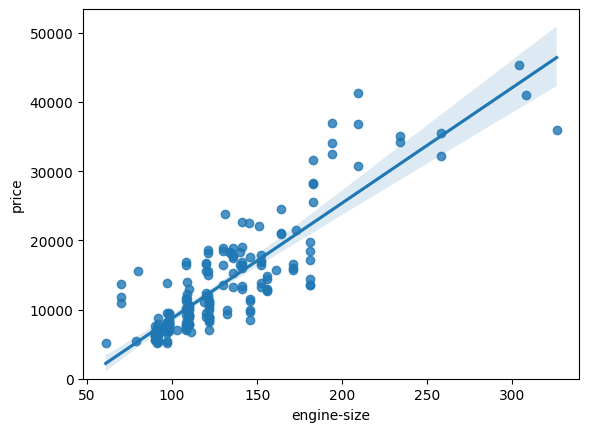

In [ ]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df) # Positive Linear Relationship
plt.ylim(0,)

In [ ]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.

<Axes: xlabel='highway-mpg', ylabel='price'>

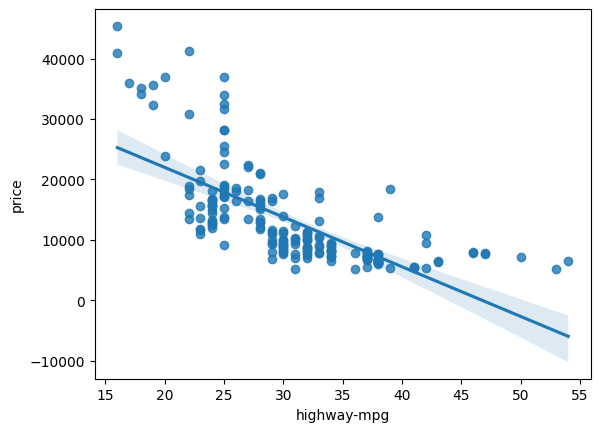

In [ ]:
# Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".
sns.regplot(x="highway-mpg", y="price", data=df)

In [ ]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.

<Axes: xlabel='peak-rpm', ylabel='price'>

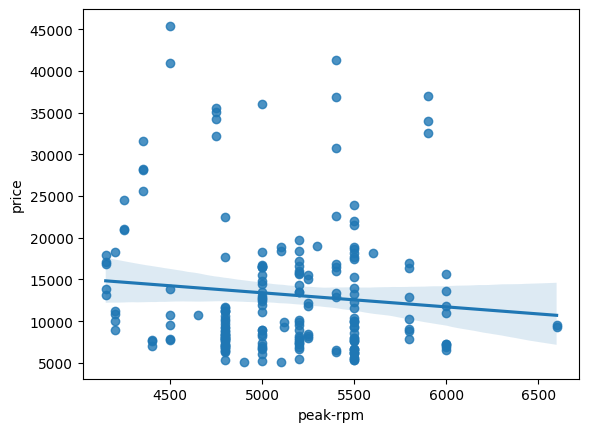

In [ ]:
# Let's see if "peak-rpm" is a predictor variable of "price".
sns.regplot(x="peak-rpm", y="price", data=df)

In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.

<Axes: xlabel='stroke', ylabel='price'>

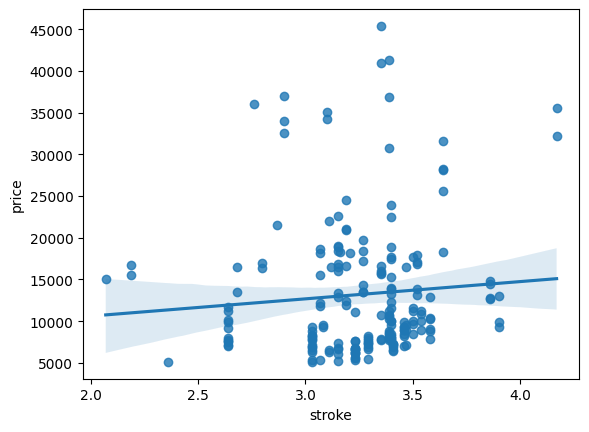

In [ ]:
#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well.
# We can see this using "regplot" to demonstrate this.

sns.regplot(x="stroke", y="price", data=df)

In [ ]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


## Categorical Variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<Axes: xlabel='body-style', ylabel='price'>

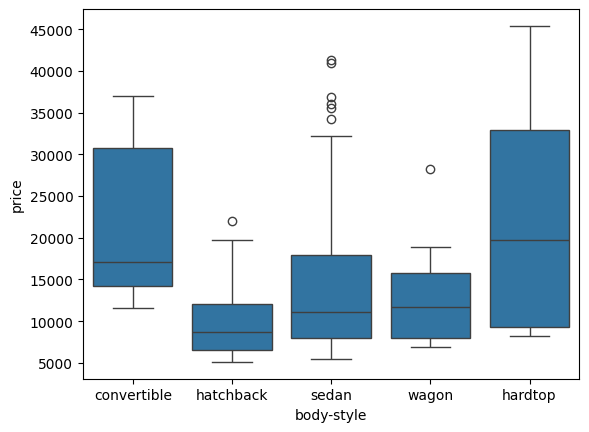

In [ ]:
# Let's look at the relationship between "body-style" and "price".
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

<Axes: xlabel='engine-location', ylabel='price'>

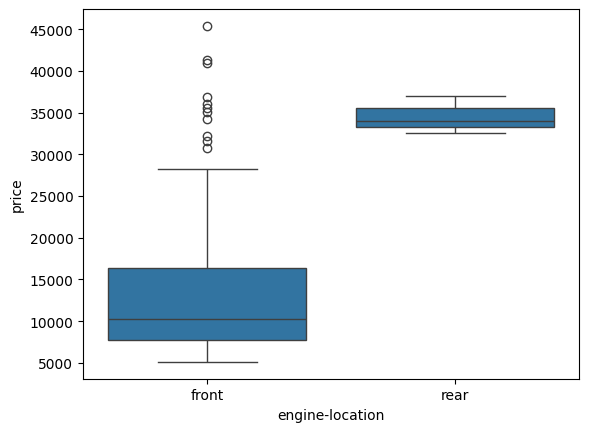

In [ ]:
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's examine "drive-wheels" and "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

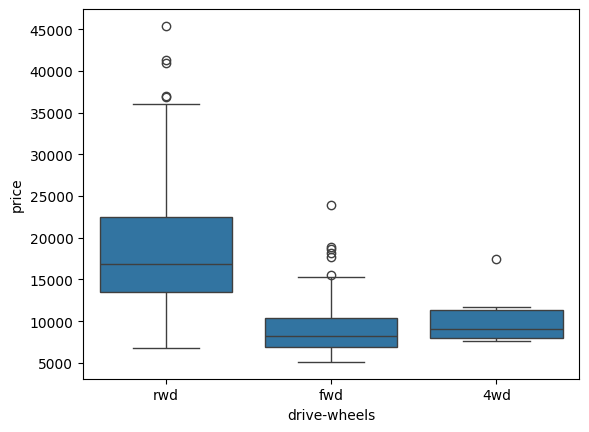

In [ ]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

## Descriptive Statistical Analysis


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li>
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [ ]:
# We can apply the method "describe"
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256904,10.164279,103.393035,5117.587940,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.319256,4.004965,37.365623,478.113178,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [ ]:
# The default setting of "describe" skips variables of type object.
# We can apply the method "describe" on the variables of type 'object' as follows:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


### Value Counts

<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>


In [ ]:
df['drive-wheels'].value_counts()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
# We can convert the series to a dataframe as follows:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
# Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and
# rename the column 'drive-wheels' to 'value_counts'.
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
# Now let's rename the index to 'drive-wheels':
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
# We can repeat the above process for the variable 'engine-location'.
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.



## Basics of Grouping


The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

In [ ]:
df_group_one = df[['drive-wheels','body-style','price']]

In [ ]:
df_group_one.head(10)

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


In [ ]:
df_group_one.dtypes

,0
drive-wheels,object
body-style,object
price,float64


In [ ]:
# Remove non-numeric columns and group by 'drive-wheels'
df_group_one_numeric = df_group_one[['drive-wheels', 'price']]
df_group_one_grouped = df_group_one_numeric.groupby(['drive-wheels'], as_index=False).mean()

In [ ]:
df_group_one_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [ ]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:

In [ ]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject.

In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [ ]:
# the "groupby" function to find the average "price" of each car based on "body-style".
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


#### Variables: Drive Wheels and Body Style vs. Price

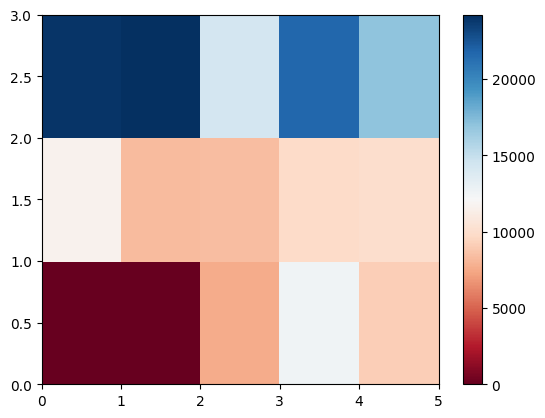

In [ ]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

The default labels convey no useful information to us. Let's change that:

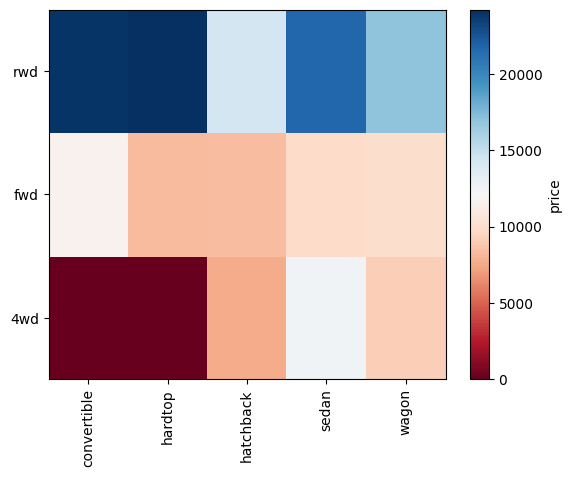

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im, label="price")
plt.show()

Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.

The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?

## Correlation and Causation


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


Sometimes we would like to know the significant of the correlation estimate.

<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [ ]:
#We can obtain this information using "stats" module in the "scipy" library.
from scipy import stats

### Wheel-Base vs. Price

In [ ]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


Since the p-value is
 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

### Horsepower vs. Price

In [ ]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8097290352560285  with a P-value of P =  5.924001027593321e-48


Since the p-value is
 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

### Length vs. Price

In [ ]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'.
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.01647746615924e-30


Since the p-value is
 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

### Engine-Size vs. Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


Since the p-value is
 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

### Bore vs. Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431537659807734  with a P-value of P =   8.051208825441031e-17


Since the p-value is
 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

### City-mpg vs. Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29


Since the p-value is
 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

### Highway-mpg vs. Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.749547114447557e-31


Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

### Conclusion: Important Variables ###


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


# Model Development



We will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

We often use Model Development to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

## 1. Linear Regression and Multiple Linear Regression

### Linear regression

**Simple Linear Regression**

Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

$$
 Y: Response \ Variable\\\\\\
 X: Predictor \ Variables
$$


**Linear function**

$$
Yhat = a + b  X
$$


- **a** refers to the intercept of the regression line, in other words: the value of Y when X is 0
- **b** refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [ ]:
# Let's load the modules for linear regression:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

How could "highway-mpg" help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [ ]:
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
# Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [ ]:
# We can output a prediction:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [ ]:
# What is the value of the intercept (a)?
lm.intercept_

38423.3058581574

In [ ]:
# What is the value of the slope (b)?
lm.coef_

array([-821.73337832])

What is the final estimated linear model we get?

As we saw above, we should get a final linear model with the structure:

$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

**Price** = 38423.31 - 821.73 x **highway-mpg**

In [ ]:
# Create a linear regression object called "lm1".
lm1 = LinearRegression()
lm1

LinearRegression()

In [ ]:
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [ ]:
# What is the value of the intercept (a)?
lm1.intercept_

array([-7963.33890628])

In [ ]:
# What is the value of the slope (b)?
lm1.coef_

array([[166.86001569]])

In [ ]:
# What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

### Multiple Linear Regression

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$


$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$


The equation is given by:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
# Fit the linear model using the four above-mentioned variables.
lm.fit(Z, df['price'])

LinearRegression()

In [ ]:
# What is the value of the intercept(a)?
lm.intercept_

-15831.93096029948

In [ ]:
# What are the values of the coefficients (b1, b2, b3, b4)?
lm.coef_

array([53.66247317,  4.70938694, 81.44600167, 36.55016267])

What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


In [ ]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price",
# and the predictor variable is "normalized-losses" and "highway-mpg".
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [ ]:
# Find the coefficient of the model.
lm2.coef_

array([   1.49789586, -820.45434016])

## Model Evaluation Using Visualization

Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

Import the visualization package, seaborn:

In [ ]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

### Regression Plot


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


(0.0, 48172.085743009404)

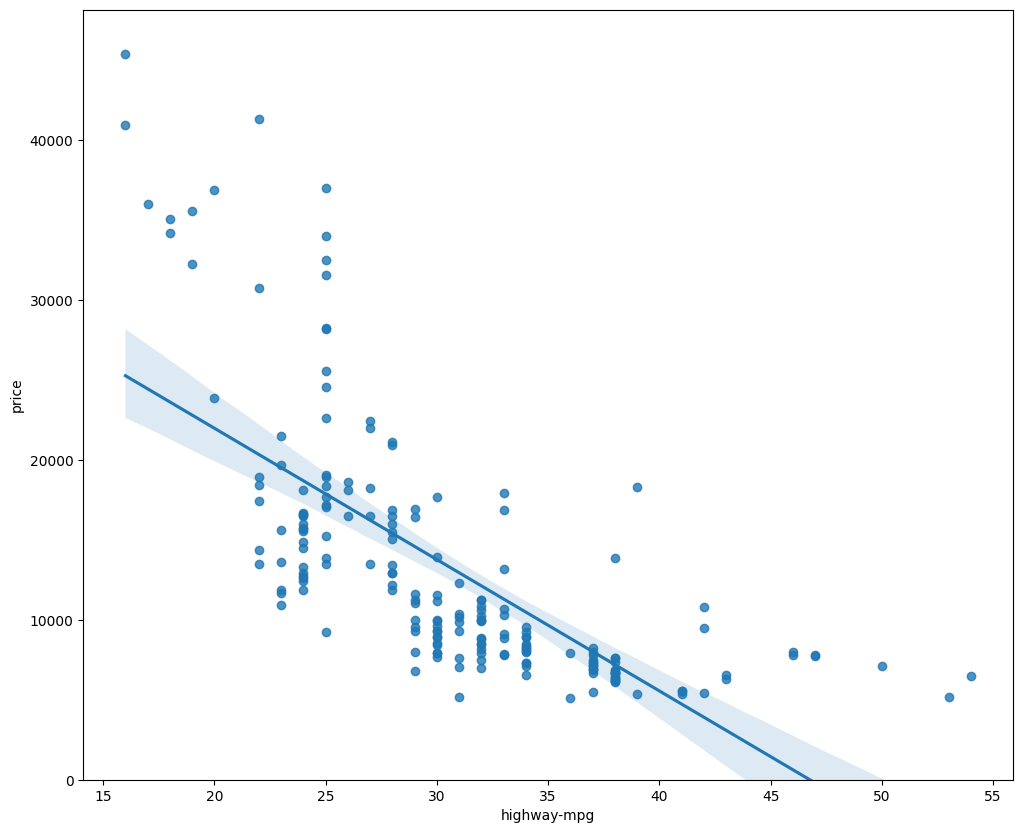

In [ ]:
# Let's visualize highway-mpg as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

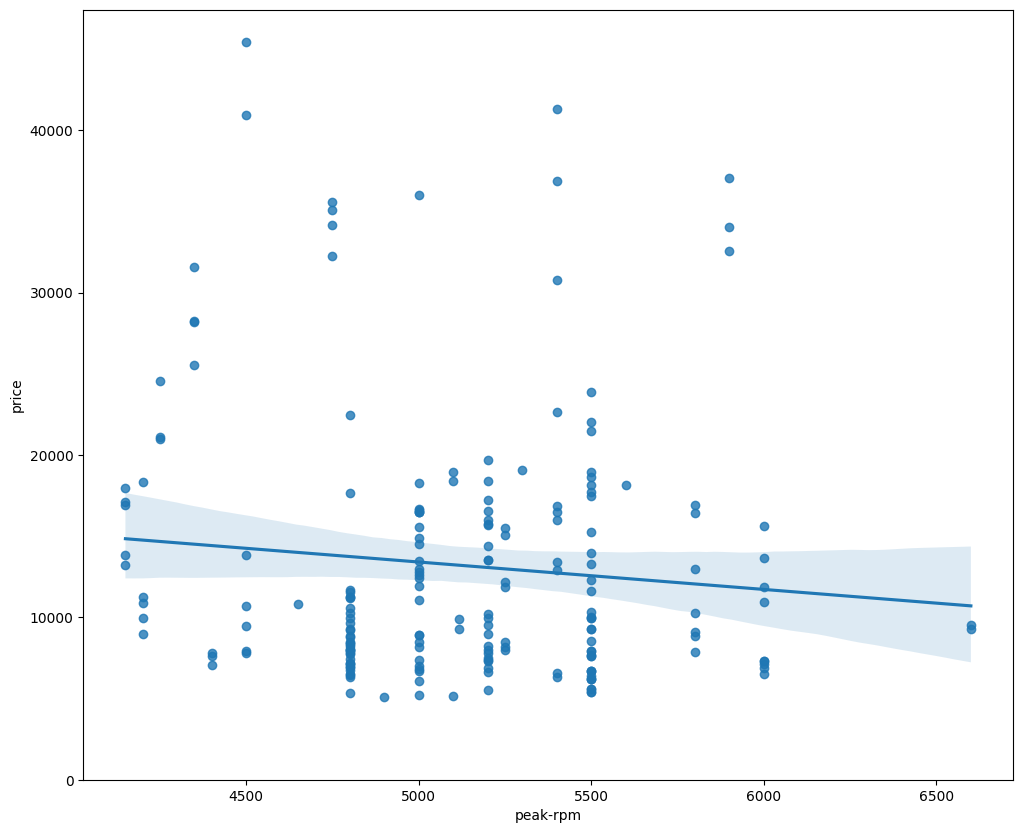

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [ ]:
# The variable "highway-mpg" has a stronger correlation with "price",
# it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.
# You can verify it using the following command:

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058605,-0.101542
highway-mpg,-0.058605,1.000000,-0.704692
price,-0.101542,-0.704692,1.000000


### Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

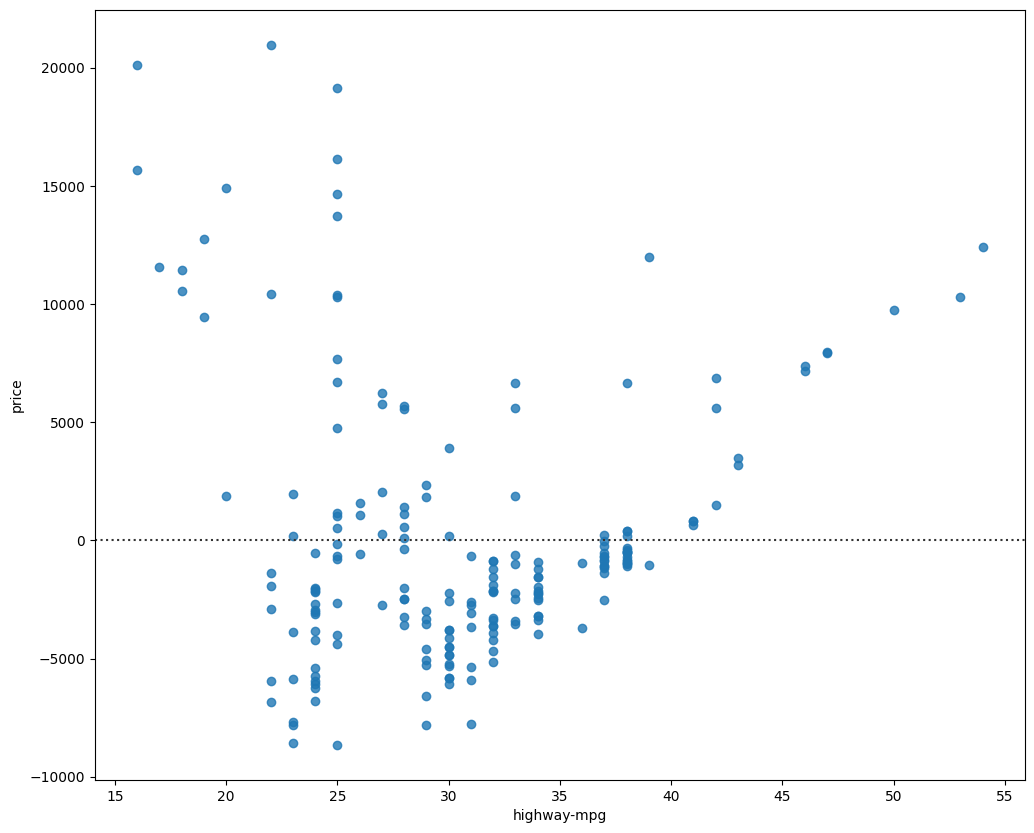

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [ ]:
# First, let's make a prediction:
Y_hat = lm.predict(Z)

<ipython-input-108-c32bbba1eafd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-108-c32bbba1eafd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values

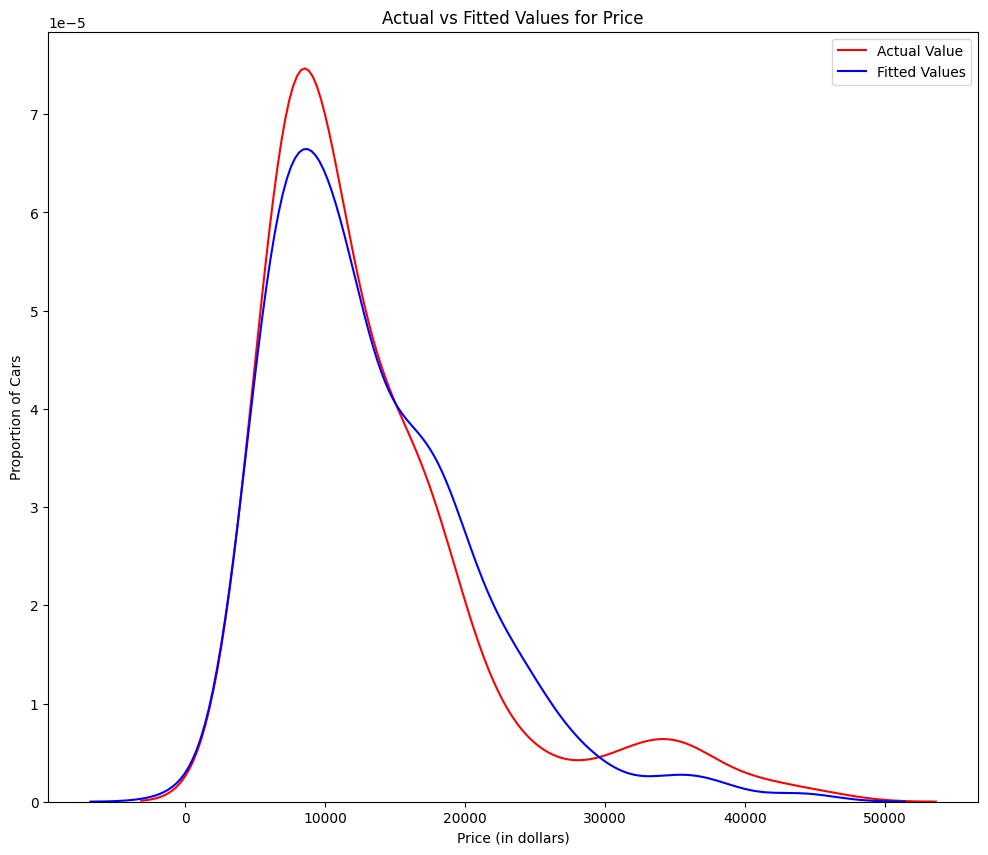

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Polynomial Regression and Pipelines

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p>
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$


We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
# Let's get the variables:
x = df['highway-mpg']
y = df['price']

# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


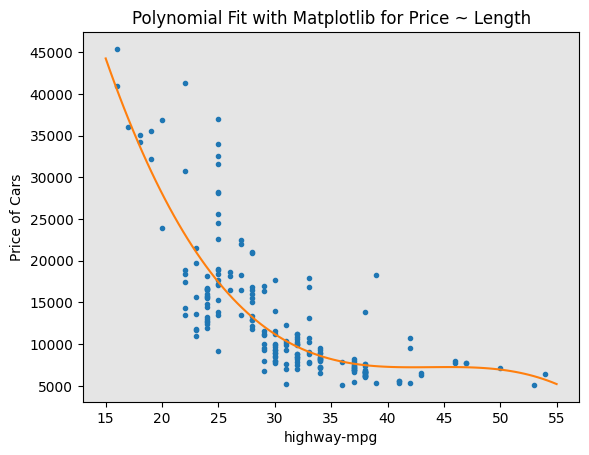

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


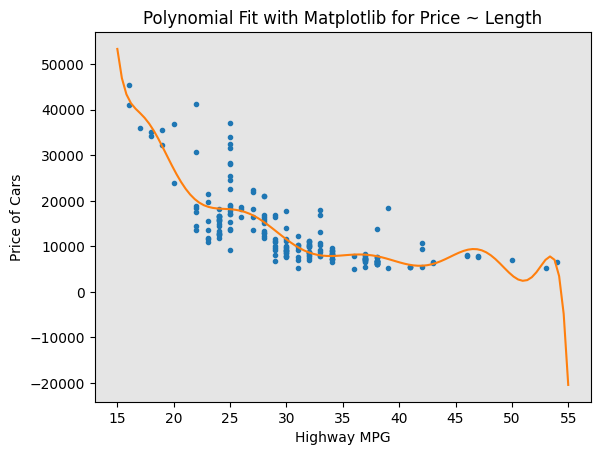

In [ ]:
# Here we use a polynomial of the 11rd order (cubic)
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


In [ ]:
# We can perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

# We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
# In the original data, there are 201 samples and 4 features.
Z.shape

(201, 4)

In [ ]:
# After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

## Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
# We input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13103.67557905, 13103.67557905, 18229.84126783, 10394.17656982])

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [ ]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778, 13867.78444008, 15454.84783873, 15972.88040209,
       17614.41285158, 10723.08344825])

## Measures for In-Sample Evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


### Model 1: Simple Linear Regression

In [ ]:
# Let's calculate the R^2:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE:

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [ ]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [ ]:
# Let's import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

In [ ]:
# We can compare the predicted results with the actual results:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Model 2: Multiple Linear Regression

In [ ]:
# Let's calculate the R^2:
# fit the model
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.80943904228153


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE.

We produce a prediction:

In [ ]:
Y_predict_multifit = lm.predict(Z)

# We compare the predicted results with the actual results:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11975165.99330355


### Model 3: Polynomial Fit

In [ ]:
# Let's calculate the R^2.
# Let’s import the function r2_score from the module metrics as we are using a different function.
from sklearn.metrics import r2_score

In [ ]:
# We apply the function to get the value of R^2:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

### MSE

In [ ]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## Prediction and Decision Making

### Prediction

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
# Create a new input:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [ ]:
# Fit the model:
lm.fit(X, Y)
lm

LinearRegression()

In [ ]:
# Produce a prediction:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

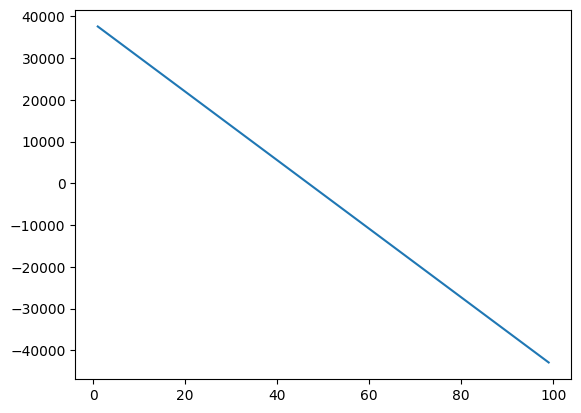

In [ ]:
# We can plot the data:
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Determining a Good Model Fit

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


### Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


### Simple Linear Model (SLR) vs. Polynomial Fit

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li>
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


### Multiple Linear Regression (MLR) vs. Polynomial Fit

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


## Conclusion

Comparing these three models, we conclude that **the MLR model** is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.

# Model Evaluation and Refinement

In [ ]:
# First, let's only use numeric data:
df = df._get_numeric_data()

In [ ]:
df.head(5)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0


In [ ]:
# Libraries for plotting:
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
# Functions for Plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1: Training and Testing

In [ ]:
# An important step in testing your model is to split your data into training and testing data.
# We will place the target data price in a separate dataframe y_data:
y_data = df['price']

# Drop price data in dataframe x_data:
x_data=df.drop('price',axis=1)

In [ ]:
# Now, we randomly split our data into training and testing data using the function train_test_split.
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


The test_size parameter sets the proportion of data that is split into the testing set.
In the above, the testing set is 10% of the total dataset.


Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function are following: "x_train1" , "x_test1", "y_train1" and "y_test1".

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [ ]:
# Let's import LinearRegression from the module linear_model.
from sklearn.linear_model import LinearRegression

# We create a Linear Regression object:
lre=LinearRegression()

In [ ]:
# We fit the model using the feature "horsepower":
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [ ]:

# Let's calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)


0.36339478087886834

In [ ]:

# We can see the R^2 is much smaller using the test data compared to the training data.
lre.score(x_train[['horsepower']], y_train)

0.6622424809407366

In [ ]:
# Find the R^2 on the test data using 40% of the dataset for testing.
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print(lre.fit(x_train1[['horsepower']],y_train1))
print(lre.score(x_test1[['horsepower']],y_test1))

LinearRegression()
0.7141148824069643


## Cross-Validation Score

In [ ]:
# Let's import cross_val_score from the module model_selection.
from sklearn.model_selection import cross_val_score

In [ ]:
# We input the object, the feature ("horsepower"), and the target data (y_data).
# The parameter 'cv' determines the number of folds. In this case, it is 4.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

# The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
Rcross

array([0.77477095, 0.51725019, 0.74924821, 0.04771764])

In [ ]:
# We can calculate the average and standard deviation of our estimate:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5222467481979474 and the standard deviation is 0.29176230741826353


In [ ]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20240865.23167852, 43737944.37864213, 12470270.77569642,
       17574447.8797166 ])

In [ ]:
# Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5174371732192354

In [ ]:
# You can also use the function 'cross_val_predict' to predict the output.
# The function splits up the data into the specified number of folds,
# with one fold for testing and the other folds are used for training. First, import the function:

from sklearn.model_selection import cross_val_predict

# We input the object, the feature "horsepower", and the target data y_data.
# The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14144.56553323, 14144.56553323, 20819.140433  , 12747.56148444,
       14765.45622158])

## Part 2: Overfitting, Underfitting and Model Selection

It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [ ]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [ ]:
# Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7425.12006788, 28327.02313301, 14210.29915814,  4054.61292262,
       34498.57562361])

In [ ]:
# Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11350.96269501,  5884.81415149, 11206.85674887,  6640.86207975,
       15566.72516819])

In [ ]:
# Let's perform some model evaluation using our training and testing data separately.
# First, we import the seaborn and matplotlib library for plotting.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

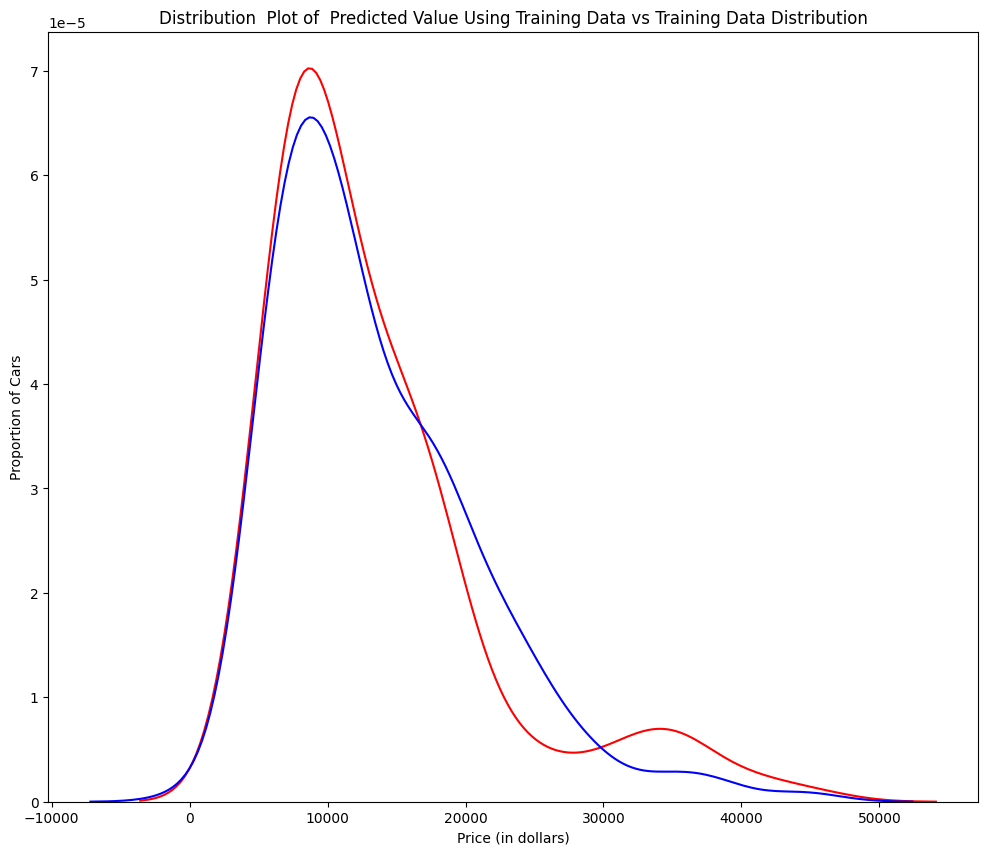

In [ ]:
# Let's examine the distribution of the predicted values of the training data.
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

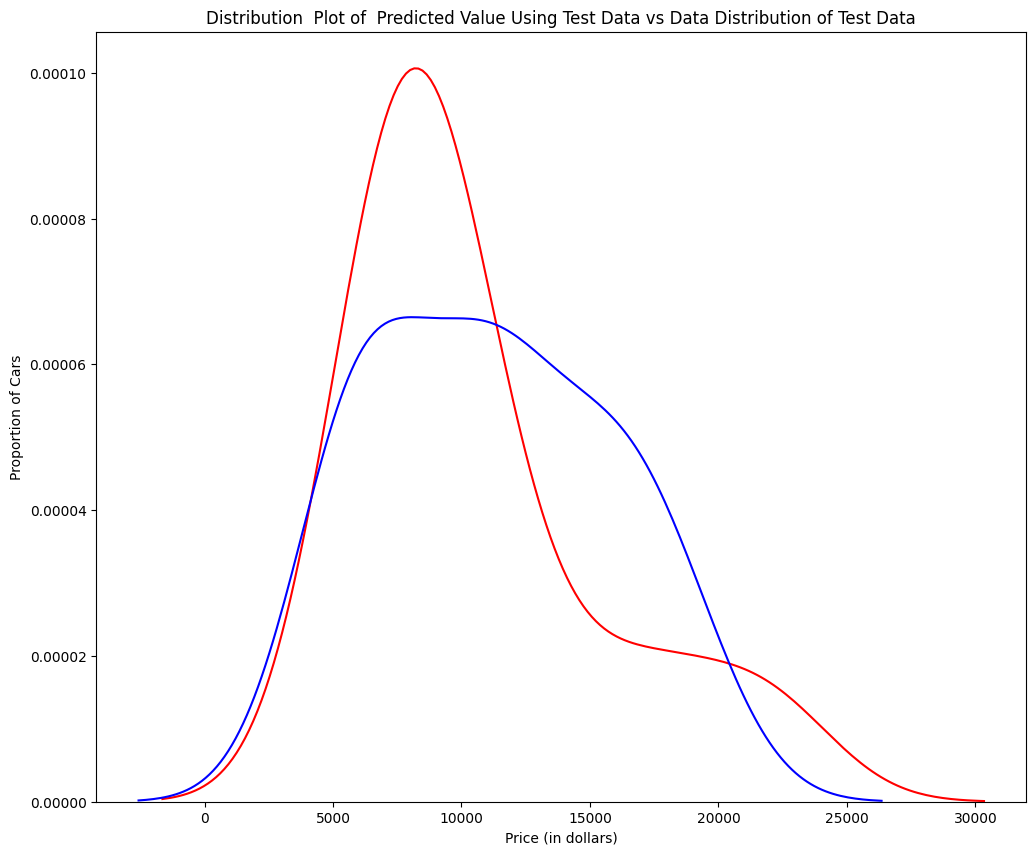

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting

<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

In [ ]:
# Let's use 55 percent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

# We will perform a degree 5 polynomial transformation on the feature 'horsepower'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [ ]:
# Now, let's create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Predicted values: [ 6722.92300002  7301.45333978 12214.15881644 18901.60512403]
True values: [ 6295. 10698. 13860. 13499.]


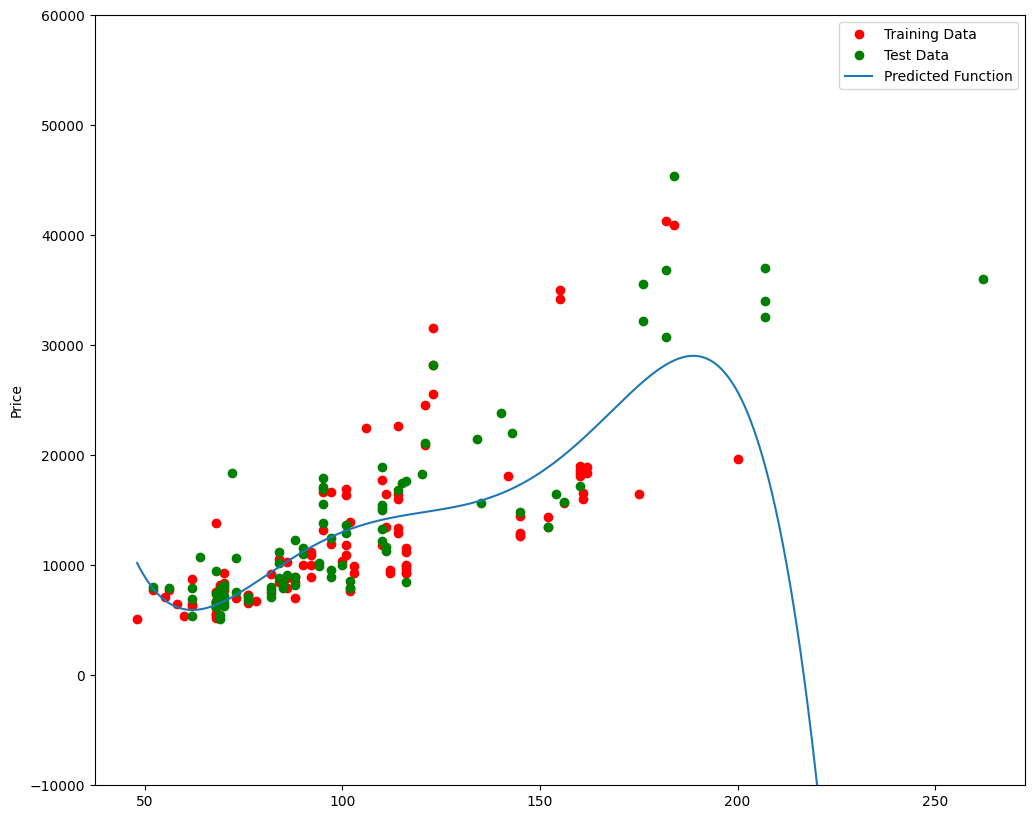

In [ ]:
# We can see the output of our model using the method "predict." We assign the values to "yhat".
yhat = poly.predict(x_test_pr)
yhat[0:5]

# Let's take the first five predicted values and compare it to the actual targets.
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

# We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data,
# testing data, and the predicted function.
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

R^2 of the training data:

In [ ]:
poly.score(x_train_pr, y_train)

0.5571757385331852

In [ ]:
# R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.624484137942915

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Text(3, 0.75, 'Maximum R^2 ')

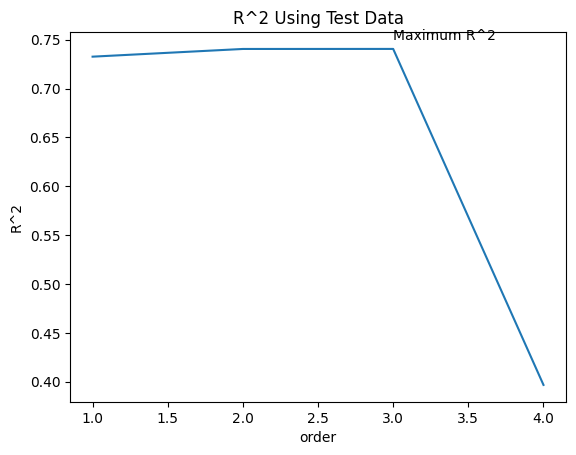

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

The following function will be used in the next section. Please run the cell below.

In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

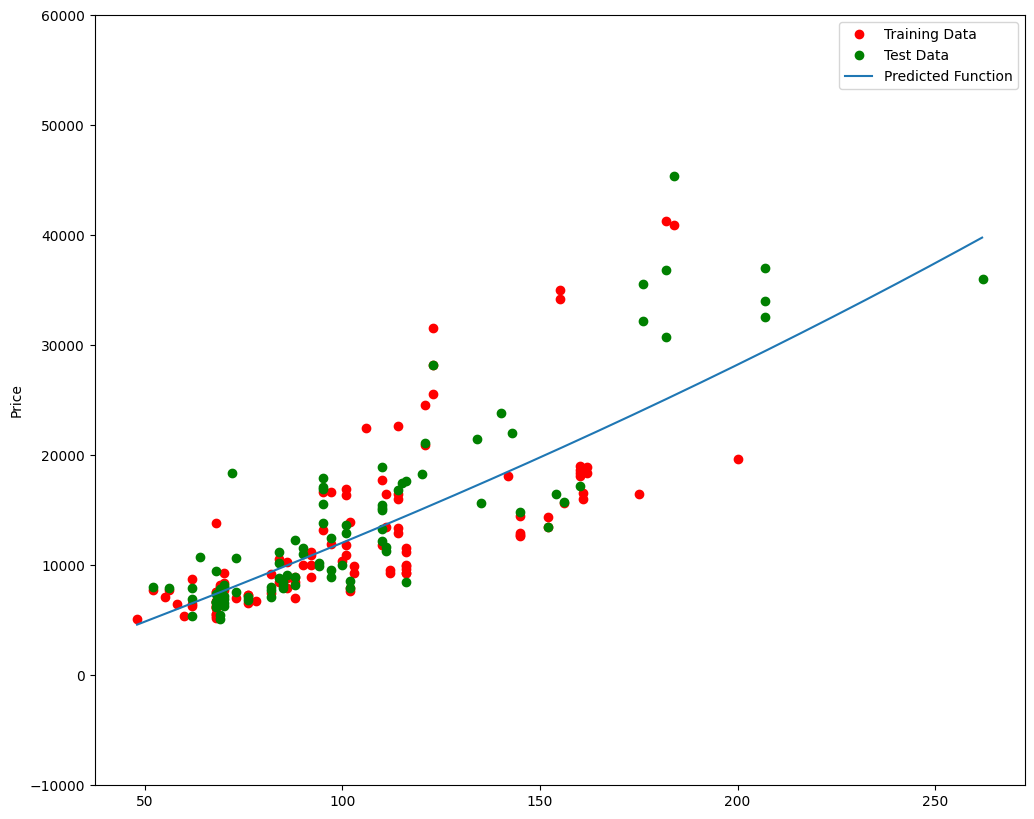

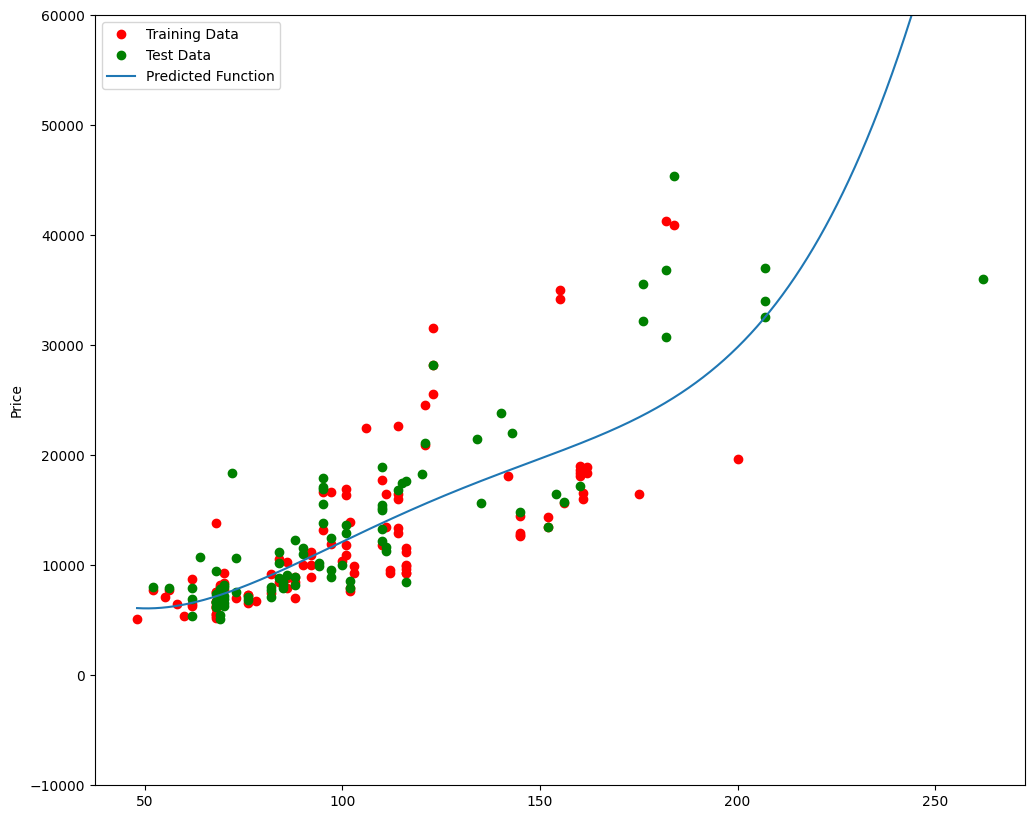

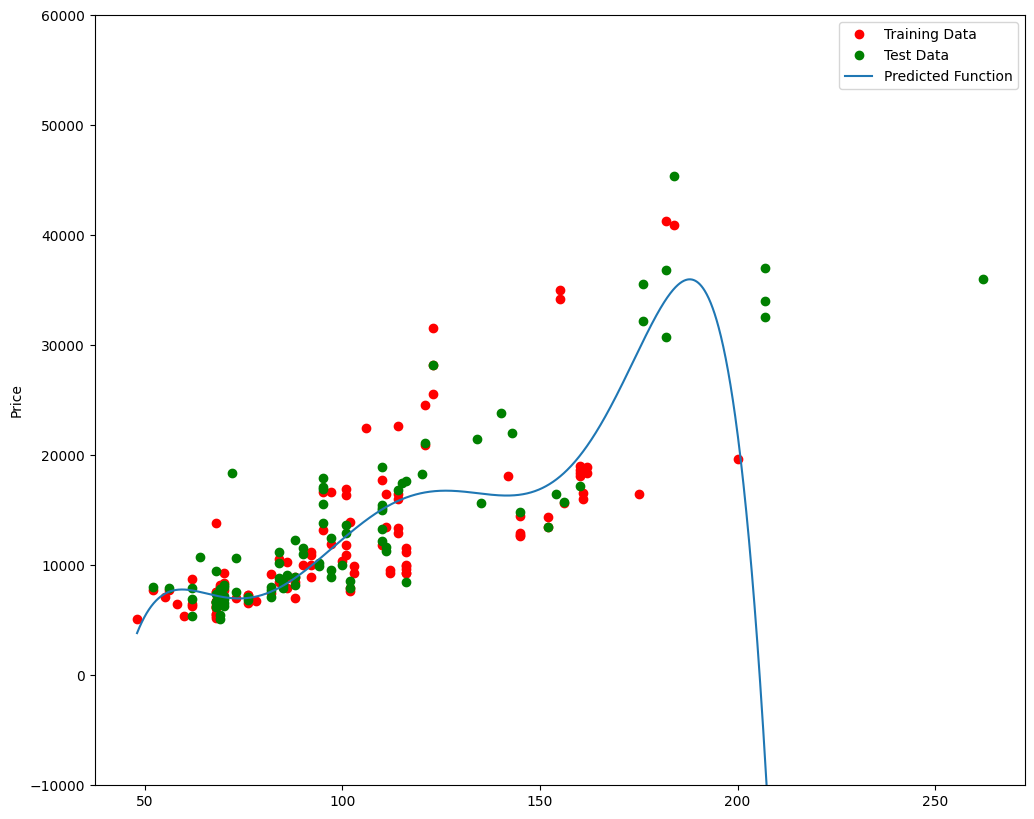

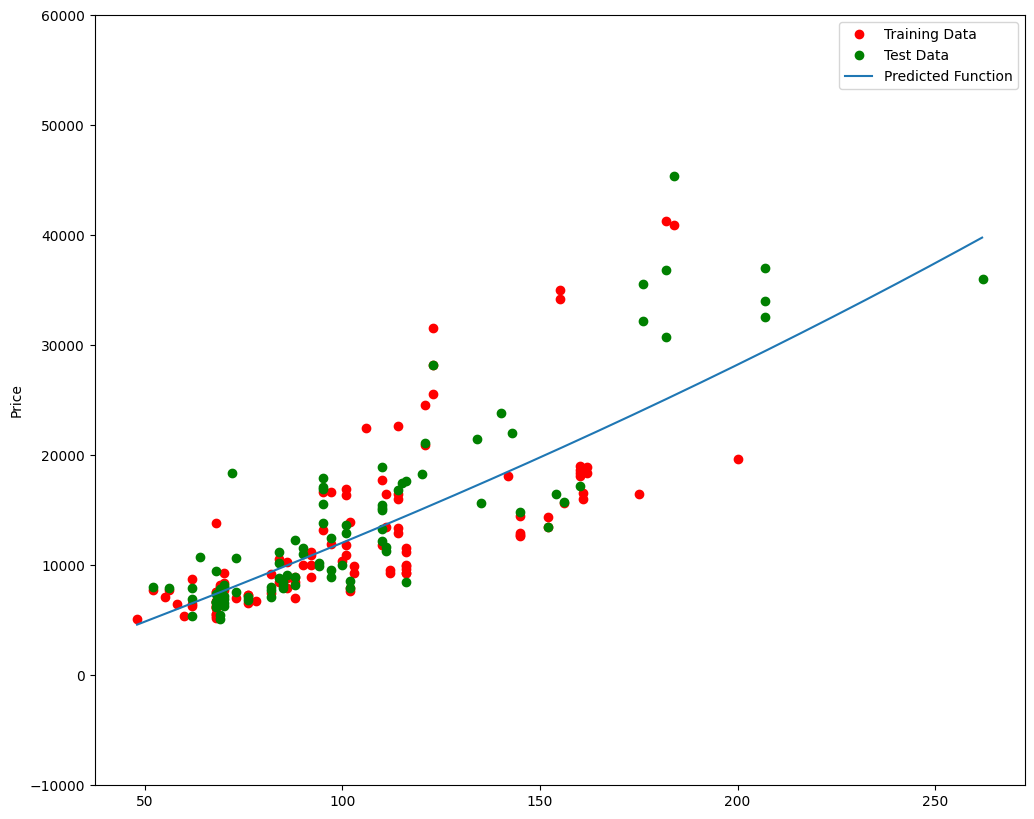

In [ ]:
# The following interface allows you to experiment with different polynomial orders and different amounts of data.
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [ ]:
# We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1=PolynomialFeatures(degree=2)

In [ ]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [ ]:
# How many dimensions does the new feature have? Hint: use the attribute "shape".
x_train_pr1.shape #there are now 15 features

(110, 15)

In [ ]:
# Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1=LinearRegression().fit(x_train_pr1,y_train)

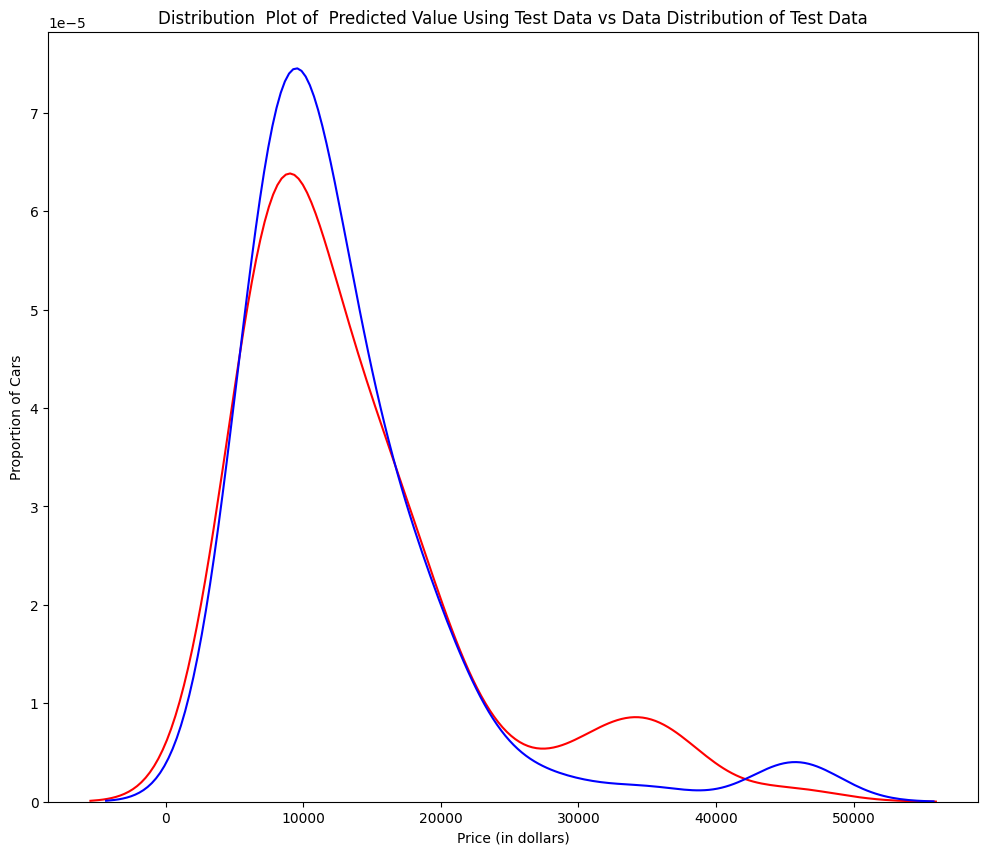

In [ ]:
# Use the method "predict" to predict an output on the polynomial features,
# then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is higher than actual value for cars where the price 10,000 range, conversely the predicted price is lower than the price cost in the 30,000 to 40,000 range. As such the model is not as accurate in these ranges.

## Part 3: Ridge Regression

we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Let's import Ridge from the module linear models.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel=Ridge(alpha=1)

# Like regular regression, you can fit the model using the method fit.
RigeModel.fit(x_train_pr, y_train)

# Similarly, you can obtain a prediction:
yhat = RigeModel.predict(x_test_pr)

# Let's compare the first five predicted samples to our test set:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)


predicted: [ 6577.53720013  9627.07836056 20940.46130682 19402.66018406]
test set : [ 6295. 10698. 13860. 13499.]


In [ ]:
# We select the value of alpha that minimizes the test error.
# To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:11<00:00, 83.95it/s, Test Score=0.564, Train Score=0.859]


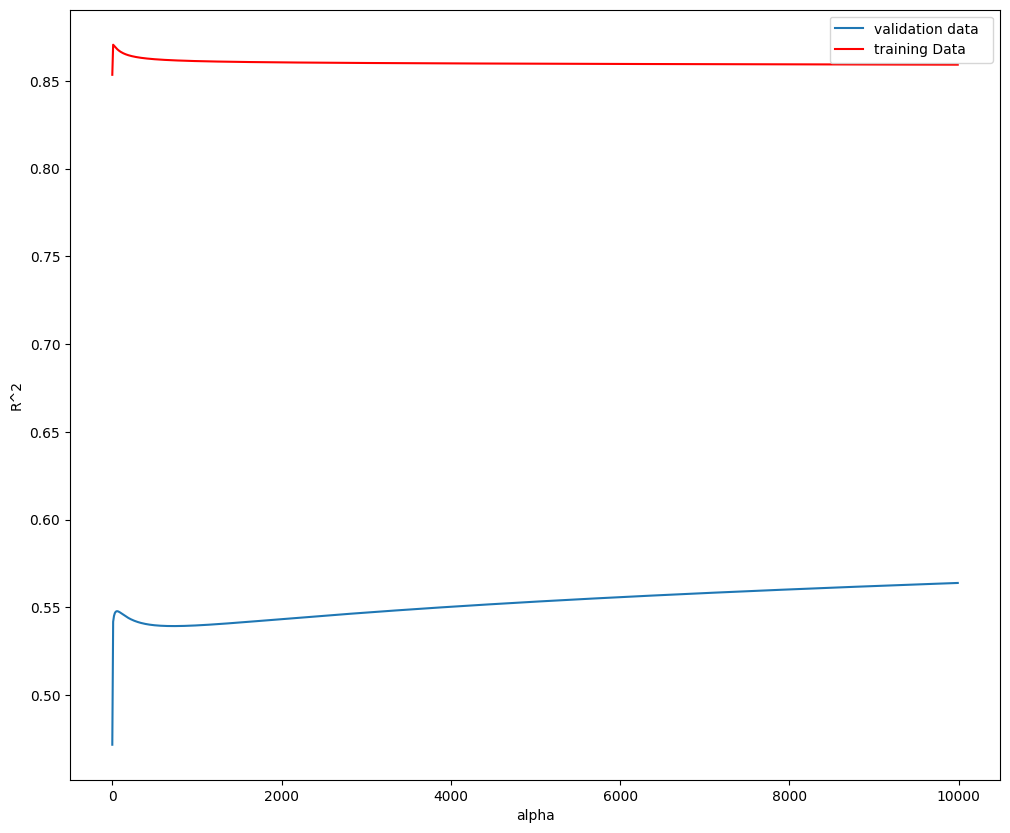

In [ ]:
# We can plot out the value of R^2 for different alphas:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Figure 4: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

In [ ]:
#  Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model.
# The parameter alpha should be set to 10.
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5417231204484136

## Part 4. Grid Search

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

Let's import GridSearchCV from the module model_selection.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# We create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

# Create a Ridge regression object:
RR=Ridge()
RR

Ridge()

In [ ]:
# Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [ ]:
# Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

# The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters
# and assign it to the variable BestRR as follows:

BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [ ]:
# We now test our model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8412287494745088

In [ ]:
# a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)



Ridge(alpha=10000)

# Author
Dilshod Durdiev